<a href="https://colab.research.google.com/github/KaveeshaChan/SDGP-SE-37/blob/main/FrontBuffer_damage_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'


  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-eh_zpw0x
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-eh_zpw0x
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=375644 sha256=b829977dcd3bb41672a79dd9a788fb64bc6731a7a3594874072a22e2babdadc3
  Stored in directory: /tmp/pip-ephem-wheel-cache-gp199hic/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.7
    Uninstalling pycocotools-2.0.7:
      Successfully uninstalled pycocotools-2.0.7


In [4]:
!pip install tensorflow-object-detection-api



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.4 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844486 sha256=3ddb8b1e1be90f0a1959758a379362535aa805a4ecbbe222b0d81f2dd501b2a1
  Stored in directory: /root/.cache/pip/wheels/8a/55/68/c084bc2cd93c41fd8f7e2ef9e6bbcb2c35a3e4b49e42044d02
Successfully built tensorflow-object-detection-api


Image, Rename and Convert to png

Convert to PNG and rename file for Frontbuffer Undamaged

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/RenamedDataset2/Renamed/not damaged/front buffer"
output_folder = "/content/drive/MyDrive/RenamedDataset2/Renamed2/damaged/buffer/undamaged_buffer"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Front-Buffer_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

Convert to PNG and rename file for Frontbuffer(minor )

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/RenamedDataset2/Ashen/dataset/buffer/buffer(minor)"
output_folder = "/content/drive/MyDrive/RenamedDataset2/Renamed2/damaged/buffer/buffer(minor)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Front-Buffer(minor)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))


Convert to PNG and rename file for Frontbuffer(moderate)

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/RenamedDataset2/Ashen/dataset/buffer/buffer(mod)"
output_folder = "/content/drive/MyDrive/RenamedDataset2/Renamed2/damaged/buffer/buffer(moderate)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Front-Buffer(moderate)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))


Convert to PNG and rename file for Frontbuffer(severe)

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/RenamedDataset2/Ashen/dataset/buffer/buffer(sev)"
output_folder = "/content/drive/MyDrive/RenamedDataset2/Renamed2/damaged/buffer/buffer(severe))"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Front-Buffer(severe)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

In [5]:
import tensorflow as tf
import os

data_dir = "/content/drive/MyDrive/RenamedDataset2/Renamed2/damaged/buffer"
subdirs = os.listdir(data_dir)

for subdir in subdirs:
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        count = len(os.listdir(subdir_path))
        print("Subfolder:", subdir, "Image count:", count)

Subfolder: buffer(minor) Image count: 105
Subfolder: buffer(moderate) Image count: 49
Subfolder: buffer(severe)) Image count: 39
Subfolder: undamaged_buffer Image count: 87


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import MobileNetV2


In [7]:
!pip install split-folders

In [8]:
!pip install split-folders[full]

In [9]:
import splitfolders

splitfolders.ratio("/content/drive/MyDrive/RenamedDataset2/Renamed2/damaged/buffer",
                   output="/content/drive/MyDrive/RenamedDataset2/split1",seed=1330, ratio=(.6, .2, .2), group_prefix=None)

data_training_path = "/content/drive/MyDrive/RenamedDataset2/split1/train"
data_testing_path = "/content/drive/MyDrive/RenamedDataset2/split1/test"
data_validating_path = "/content/drive/MyDrive/RenamedDataset2/split1/val"


Copying files: 280 files [01:57,  2.39 files/s]


In [10]:
img_width = 180
img_height = 180
batch_size = 32

data_train = tf.keras.utils.image_dataset_from_directory(
    data_training_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    validation_split=None
)

data_val = tf.keras.utils.image_dataset_from_directory(
    data_validating_path,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False,
    validation_split=None
)

data_test = tf.keras.utils.image_dataset_from_directory(
    data_testing_path,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False,
    validation_split=None
)

class_names = data_train.class_names


Found 167 files belonging to 4 classes.
Found 54 files belonging to 4 classes.
Found 59 files belonging to 4 classes.


In [11]:
# Define class names
class_names = data_train.class_names

# Using functional API to build the model
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
base_model = MobileNetV2(input_tensor=inputs, include_top=False, weights='imagenet')
base_model.trainable = False
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(len(class_names), activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


9406464/9406464 [==============================] - 0s 0us/step


In [12]:
epochs = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs)


Epoch 1/25
6/6 [==============================] - 28s 3s/step - loss: 1.4579 - accuracy: 0.3593 - val_loss: 1.1342 - val_accuracy: 0.5370
Epoch 2/25
6/6 [==============================] - 9s 1s/step - loss: 0.9946 - accuracy: 0.5928 - val_loss: 1.0495 - val_accuracy: 0.6296
Epoch 3/25
6/6 [==============================] - 11s 1s/step - loss: 0.8414 - accuracy: 0.6587 - val_loss: 1.0441 - val_accuracy: 0.5926
Epoch 4/25
6/6 [==============================] - 9s 1s/step - loss: 0.7267 - accuracy: 0.7305 - val_loss: 0.9986 - val_accuracy: 0.5741
Epoch 5/25
6/6 [==============================] - 8s 965ms/step - loss: 0.7351 - accuracy: 0.7066 - val_loss: 1.0909 - val_accuracy: 0.5926
Epoch 6/25
6/6 [==============================] - 12s 2s/step - loss: 0.5547 - accuracy: 0.7964 - val_loss: 1.0532 - val_accuracy: 0.6481
Epoch 7/25
6/6 [==============================] - 9s 954ms/step - loss: 0.4907 - accuracy: 0.8144 - val_loss: 1.0716 - val_accuracy: 0.5556
Epoch 8/25
6/6 [================

In [13]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(data_test)

# Calculate additional metrics
predictions = model.predict(data_test)
y_true = np.concatenate([y for x, y in data_test], axis=0)
y_pred = np.argmax(predictions, axis=1)

precision = tf.keras.metrics.Precision()
precision.update_state(y_true, y_pred)
precision_result = precision.result().numpy()

recall = tf.keras.metrics.Recall()
recall.update_state(y_true, y_pred)
recall_result = recall.result().numpy()

f1_score = 2 * (precision_result * recall_result) / (precision_result + recall_result)

# Print evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision_result)
print("Recall:", recall_result)
print("F1 Score:", f1_score)


2/2 [==============================] - 4s 528ms/step
Test Loss: 0.9049723744392395
Test Accuracy: 0.7118644118309021
Precision: 0.8648649
Recall: 0.84210527
F1 Score: 0.8533333510253156


In [14]:
model.save('frontbuffer_damage_model_mobilenet.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 921ms/step
The uploaded image shows Severe damage with a confidence of 85.43418049812317 %.


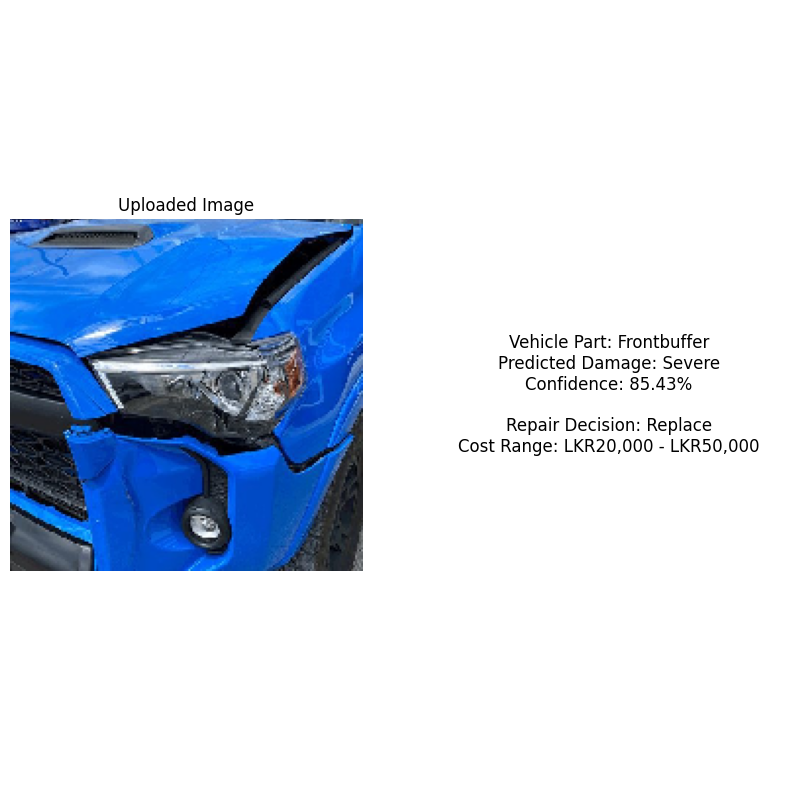

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('frontbuffer_damage_model_mobilenet.h5')

# Define image dimensions
img_width = 180
img_height = 180


# Function to estimate cost range and decision based on damage severity for front buffer
def estimate_front_buffer_cost(severity):
    if severity == "Minor":
        return "Repair", "LKR2,500 - LKR8,000"
    elif severity == "Moderate":
        return "Repair", "LKR8,000 - LKR20,000"
    elif severity == "Severe":
        return "Replace", "LKR20,000 - LKR50,000"
    else:
        return "N/A", "N/A"

# Load and preprocess the image
image_path = "/content/drive/MyDrive/RenamedDataset2/split1/test/buffer(minor)/Front-Buffer(minor)_14.png"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = tf.expand_dims(image_array, 0)

# Predict the class of the image
prediction = loaded_model.predict(image_array)
predicted_class_index = np.argmax(prediction)
confidence = np.max(prediction) * 100

# Define class names
class_names = ['undamaged', 'minor damage', 'moderate damage', 'severe damage']

# Check if the predicted class indicates damage
if class_names[predicted_class_index] != 'undamaged':
    # Further analyze the confidence level to categorize the damage
    if confidence >= 80:
        damage_category = 'Severe'
    elif confidence >= 60:
        damage_category = 'Moderate'
    else:
        damage_category = 'Minor'

    print("The uploaded image shows", damage_category, "damage with a confidence of", confidence, "%.")

    # Estimate damage cost based on severity
    repair_decision, cost_range = estimate_front_buffer_cost(damage_category)

    # Display the image with the predicted damage category and cost information
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Uploaded Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    text = f"Vehicle Part: Frontbuffer\n"
    text += f"Predicted Damage: {damage_category}\n"
    text += f"Confidence: {confidence:.2f}%\n\n"
    text += f"Repair Decision: {repair_decision}\n"
    text += f"Cost Range: {cost_range}"
    plt.text(0.5, 0.5, text, horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis("off")



    plt.show()
else:
    print("The uploaded image shows no damage.")

    # Display the undamaged image
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title("Undamaged frontbuffer")
    plt.axis("off")
    plt.show()
